In [47]:
import pandas as pd
import numpy as np
import syllables
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import tokenize,ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import textstat
import itertools
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS



In [48]:
df = pd.read_csv('out.csv')

In [3]:
df.head()

Review_Date          Author  Rating  \
0      17 June 2019    HotToastyRag    10.0   
1     23 March 2018     Cool-Lion14     8.0   
2  21 November 2001         jhclues    10.0   
3    14 August 2016  Hollywood_Yoda     8.0   
4  17 December 2004  AvinashPatalay     NaN   

                               Review_Title  \
0        There's nothing like the first\r\n   
1     The major start of all the magic!\r\n   
2              The Magic Comes To Life!\r\n   
3               Better Than Anticipated\r\n   
4   Alohomora - of the magical world...\r\n   

                                              Review  \
0  There's nothing like the first in a series, is...   
1  Having read the first few Harry Potter books b...   
2  Once upon a time (and not that long ago), in t...   
3  Like a lot of others, I refused to watch this ...   
4  I watched this movie first time when I was lef...   

                       Review_Url  
0  /review/rw3336806/?ref_=tt_urv  
1  /review/rw3336806/?ref_=tt_urv  
2  /review/rw3336806/?ref_=tt_urv  
3  /review/rw3336806/?ref_=tt_urv  
4  /review/rw3336806/?ref_=tt_urv

In [4]:
df.isnull().sum().sort_values(ascending = False)

Rating          355
Review_Date       0
Author            0
Review_Title      0
Review            0
Review_Url        0
dtype: int64

In [49]:
def clean_text(a):
    a_replaced = re.sub('[^A-Za-z0-9]+', ' ', a)
    a_replaced = re.sub(r'w+:/{2}[dw-]+(.[dw-]+)*(?:(?:/[^s/]*))*', '', a_replaced)
    a_replaced = re.sub('n', ' ', a_replaced)
    a_replaced = re.sub(' +', ' ', a_replaced)    
    return a_replaced

In [50]:
df['Review_Words'] = df['Review'].apply(lambda x : len( x.split()) )
df['Review_Words']

0        71
1       157
2       302
3        35
4        73
       ... 
1940     49
1941    136
1942    147
1943    163
1944    101
Name: Review_Words, Length: 1945, dtype: int64

In [7]:
df['Review_Date']

0            17 June 2019
1           23 March 2018
2        21 November 2001
3          14 August 2016
4        17 December 2004
              ...        
1940        13 March 2022
1941        21 April 2015
1942     12 November 2005
1943    10 September 2015
1944      16 October 2015
Name: Review_Date, Length: 1945, dtype: object

In [51]:
df['Review_Date_Cleaned'] = pd.to_datetime(df['Review_Date']).dt.date
df['Review_Date_Cleaned']

0       2019-06-17
1       2018-03-23
2       2001-11-21
3       2016-08-14
4       2004-12-17
           ...    
1940    2022-03-13
1941    2015-04-21
1942    2005-11-12
1943    2015-09-10
1944    2015-10-16
Name: Review_Date_Cleaned, Length: 1945, dtype: object

In [52]:
df['Total_Syllables'] = df['Review'].apply(lambda x : syllables.estimate(x))
df['Total_Syllables'] 

0       115
1       227
2       444
3        52
4       116
       ... 
1940     58
1941    228
1942    213
1943    261
1944    162
Name: Total_Syllables, Length: 1945, dtype: int64

In [53]:
df['Average_Syllables'] = df['Total_Syllables']/df['Review_Words']
df['Average_Syllables'] 

0       1.619718
1       1.445860
2       1.470199
3       1.485714
4       1.589041
          ...   
1940    1.183673
1941    1.676471
1942    1.448980
1943    1.601227
1944    1.603960
Name: Average_Syllables, Length: 1945, dtype: float64

In [54]:
df['flesch_reading_ease'] = df['Review'].apply(lambda x : textstat.flesch_reading_ease(x) )
# Example of a negative readability example
a = df.sort_values(by='flesch_reading_ease').iloc[1]
print(a['flesch_reading_ease'], '\n \n', a['Review'])



-98.03 
 
 in 2001, in the film Harry Potter and the Sorcerer's Stone, began one of the best sagas of all time, based on the book of the same name by JK Rowling, the film hit full in the cast, all actors are great in their characters, Daniel Radcliffe this impeccable as Harry Potter, the resemblance is too large, Rupert Grint this great as Ron Weasley, Emma excellent Watson as Hermione Granger, Robbie Coltrane as Hagrid, Richard Harris as Dumbledore (which unfortunately from the third movie substituted series, having deceased), Maggie Smith, Alan Rickman great as Snape, Ian Hart, Tom Felton, and etc, all goods, the special effects are great, the picture is great, especially the castles, the soundtrack is very good, and full of great moments, as the final, obvious that the movie has errors, the script has some problems, and the film is very long, I think it was longer than it should, and the film is faithful to the book, even with some missing characters, Harry Potter and the Sorcerer's

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lea\AppData\Roaming\nltk_data...


True

In [67]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

ON WORK

In [68]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
def lem(text):
    return nltk.corpus.gutenberg.words(text)
df['review_lemmas'] = df['Review'].apply(lambda x : lem(x))
df['review_lemmas']

LookupError: 
**********************************************************************
  Resource [93mgutenberg[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('gutenberg')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/gutenberg[0m

  Searched in:
    - 'C:\\Users\\Lea/nltk_data'
    - 'c:\\Users\\Lea\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data'
    - 'c:\\Users\\Lea\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data'
    - 'c:\\Users\\Lea\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data'
    - 'C:\\Users\\Lea\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [62]:
w_tokenizer = tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lancaster.stem(text)]
df['review_lemmas'] = df['Review'].apply(lambda x : lemmatize_text(x))


OK AGAIN BUT WRONG CLEANING

In [64]:
w_tokenizer = tokenize.WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(clean_text(text.lower())) if w not in stopwords.words('english')]
df['review_lemmas'] = df['Review'].apply(lambda x : lemmatize_text(x))

In [65]:
df['review_lemmas']

0       [othi, g, like, first, series, troductio, char...
1       [havi, g, read, first, harry, potter, book, 20...
2       [ce, upo, time, ot, lo, g, ago, vivid, fertile...
3       [like, lot, others, refused, watch, film, whe,...
4       [watched, movie, first, time, whe, left, choic...
                              ...                        
1940    [harry, potter, sorcerer, sto, e, released, st...
1941    [director, made, film, picture, perfect, ki, m...
1942    [movie, good, movie, ever, read, book, terribl...
1943    [like, adve, ture, fa, tasy, film, watch, harr...
1944    [dudley, birthday, held, zoo, mysterious, cide...
Name: review_lemmas, Length: 1945, dtype: object

In [17]:
pd.to_datetime(df['Review_Date']).dt.year.value_counts()

2001    676
2002    358
2020    134
2022    100
2021     88
2003     66
2005     57
2019     54
2004     52
2007     40
2018     40
2006     36
2008     33
2009     28
2016     28
2013     25
2011     25
2015     23
2010     20
2012     20
2014     19
2017     17
2023      6
Name: Review_Date, dtype: int64

In [28]:
df['Period'] = np.where(pd.to_datetime(df['Review_Date']).dt.year>=2012,'c. Post 2011','Other')
df['Period'] = np.where(pd.to_datetime(df['Review_Date']).dt.year<2012,'b. Btw 2002 and 2011',df['Period'])
df['Period'] = np.where(pd.to_datetime(df['Review_Date']).dt.year<2002,'a. During 2001',df['Period'])
df['Period'].value_counts()

b. Btw 2002 and 2011    715
a. During 2001          676
c. Post 2011            554
Name: Period, dtype: int64

355
mean         7.7
median       8.0
count     1590.0
Name: Rating, dtype: float64


<AxesSubplot: ylabel='index'>

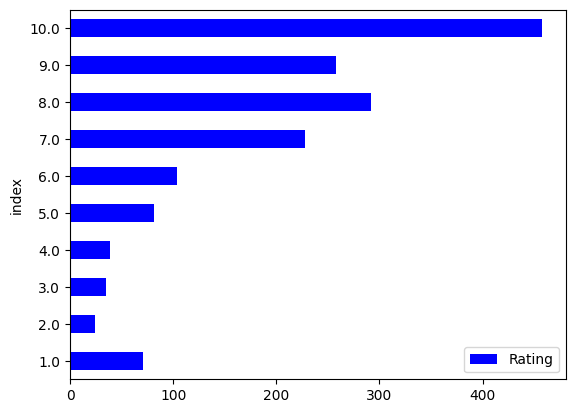

In [29]:
print(df['Rating'].isnull().sum())
print(df['Rating'].agg(['mean','median','count']).round(2))
df['Rating'].value_counts().reset_index().sort_values(by='index').plot.barh(x='index', y='Rating', color="blue")

In [30]:
df.groupby('Period')['Rating'].agg(['min','mean','median','max','count']).round(2)

min  mean  median   max  count
Period                                              
a. During 2001        1.0  7.58     8.0  10.0    507
b. Btw 2002 and 2011  1.0  7.31     8.0  10.0    549
c. Post 2011          1.0  8.21     8.0  10.0    534

<AxesSubplot: ylabel='Review_Day_no'>

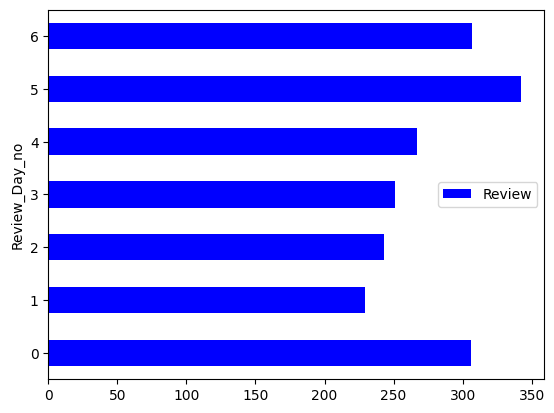

In [31]:
df['Review_Day'] = pd.to_datetime(df['Review_Date']).dt.day_name()
df['Review_Day_no'] = pd.to_datetime(df['Review_Date']).dt.dayofweek
# a = df['Review_Day_no'].value_counts().reset_index().sort_values(by='index')
c = df.groupby(['Review_Day_no','Review_Day']).Review.count().reset_index()
c.plot.barh(x='Review_Day_no', y='Review', color="blue")

In [33]:
df.groupby('Period')['Review_Day_no'].agg(['count'])
a = df.pivot_table(index='Review_Day_no',columns='Period',values='Review',aggfunc='count',margins=True)
a = (a*100).div(a.loc['All']).round(2)
a

Period         a. During 2001  b. Btw 2002 and 2011  c. Post 2011     All
Review_Day_no                                                            
0                       19.53                 14.27         13.00   15.73
1                        8.14                 13.85         13.54   11.77
2                        9.02                 14.69         13.90   12.49
3                        8.28                 13.85         17.33   12.90
4                       14.94                 11.33         15.34   13.73
5                       19.82                 17.62         14.80   17.58
6                       20.27                 14.41         12.09   15.78
All                    100.00                100.00        100.00  100.00

In [34]:
print(df[df['Review_Words']==1].shape)

(8, 15)


In [35]:
df[df['Review_Words']==1]['Review'].iloc[0]

'Spoiler!!!'

In [36]:
df.groupby('Period')['Review_Words'].agg(['min','mean','median','max','count']).round(2)

min   mean  median   max  count
Period                                               
a. During 2001          1  93.71    71.0  1094    676
b. Btw 2002 and 2011    1  98.25    78.0   861    715
c. Post 2011            1  82.66    57.0   984    554

In [37]:
full_start_letter_df = pd.DataFrame()
for period in sorted(df['Period'].unique()):
    curr_lemmatized_tokens = list(df[df['Period']==period]['review_lemmas'])
    curr_token_list = list(itertools.chain(*curr_lemmatized_tokens))
    start_letter = [i[0] for i in curr_token_list]
    start_letter_df = (pd.DataFrame(start_letter)[0].value_counts(1)*100).reset_index().sort_values(by='index')
    start_letter_df[0] = start_letter_df[0]
    start_letter_df.columns = ['letter',period]
    start_letter_df['Start_Letter'] = np.where(start_letter_df['letter'].isin(['a','e','i','o','u']),'a. Vowel',
                                                  np.where(start_letter_df['letter'].isin(['0','1','2','3','4','5','6','7','8','9']),'c. Number',
                                                       'b. Consonant')
                                              )
    start_letter_df = start_letter_df.groupby('Start_Letter')[period].sum().reset_index()
    start_letter_df.columns = ['Start_Letter',period]
    start_letter_df[period] = start_letter_df[period].apply(lambda x : np.round(x,2))
    try:
        full_start_letter_df = full_start_letter_df.merge(start_letter_df)
    except:
        full_start_letter_df = start_letter_df
print(full_start_letter_df.shape)
full_start_letter_df

(3, 4)


Start_Letter  a. During 2001  b. Btw 2002 and 2011  c. Post 2011
0      a. Vowel           19.05                 18.42         18.27
1  b. Consonant           79.71                 80.46         80.60
2     c. Number            1.24                  1.11          1.14

In [38]:
df.groupby('Period')['Average_Syllables'].agg(['mean','median','count']).round(2)

mean  median  count
Period                                   
a. During 2001        1.44    1.43    676
b. Btw 2002 and 2011  1.44    1.43    715
c. Post 2011          1.50    1.49    554

In [39]:
display(df.groupby('Rating')['flesch_reading_ease'].agg(['mean','median','count']).round(2))
df.groupby('Period')['flesch_reading_ease'].agg(['mean','median','count']).round(2)

mean  median  count
Rating                      
1.0     79.73   80.65     71
2.0     70.62   69.01     24
3.0     75.80   77.64     35
4.0     76.13   76.96     39
5.0     75.85   76.45     81
6.0     72.88   72.41    104
7.0     67.98   70.50    228
8.0     70.44   72.78    292
9.0     75.32   77.27    258
10.0    75.34   78.72    458

mean  median  count
Period                                    
a. During 2001        74.93   76.05    676
b. Btw 2002 and 2011  74.16   76.25    715
c. Post 2011          70.93   73.31    554

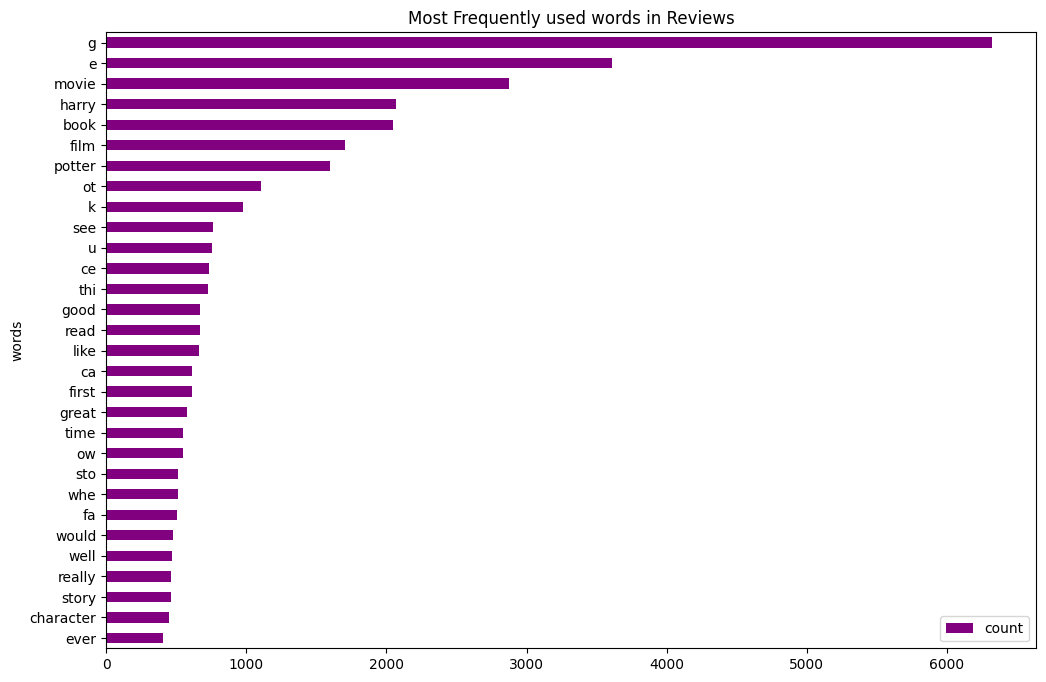

In [40]:
lemmatized_tokens = list(df['review_lemmas'])
%matplotlib inline
token_list = list(itertools.chain(*lemmatized_tokens)) 
counts_no = collections.Counter(token_list) 
# counts_no = collections.Counter(ngrams(token_list, 1))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used words in Reviews") 
plt.show()

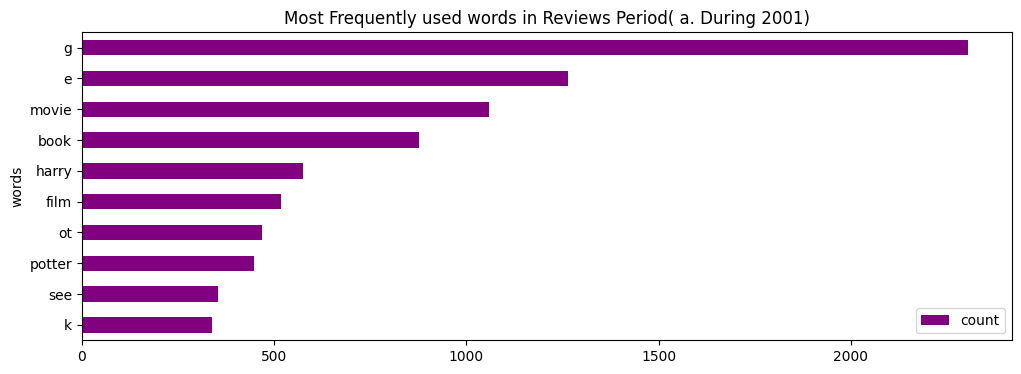

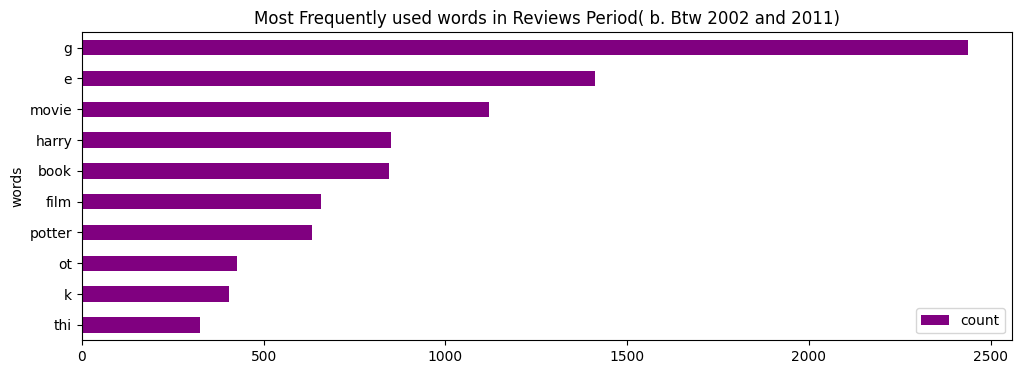

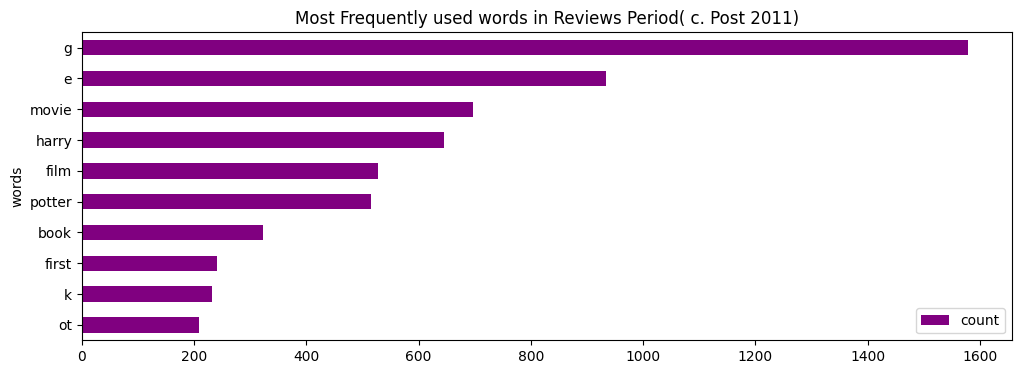

In [41]:
for period in sorted(df['Period'].unique()):
    lemmatized_tokens = list(df[df['Period']==period]['review_lemmas'])
    token_list = list(itertools.chain(*lemmatized_tokens)) 
    counts_no = collections.Counter(token_list) 
    clean_reviews = pd.DataFrame(counts_no.most_common(10), columns=['words', 'count']) 
    fig, ax = plt.subplots(figsize=(12, 4)) 
    clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
    ax.set_title("Most Frequently used words in Reviews Period( "+str(period)+")") 
    plt.show()

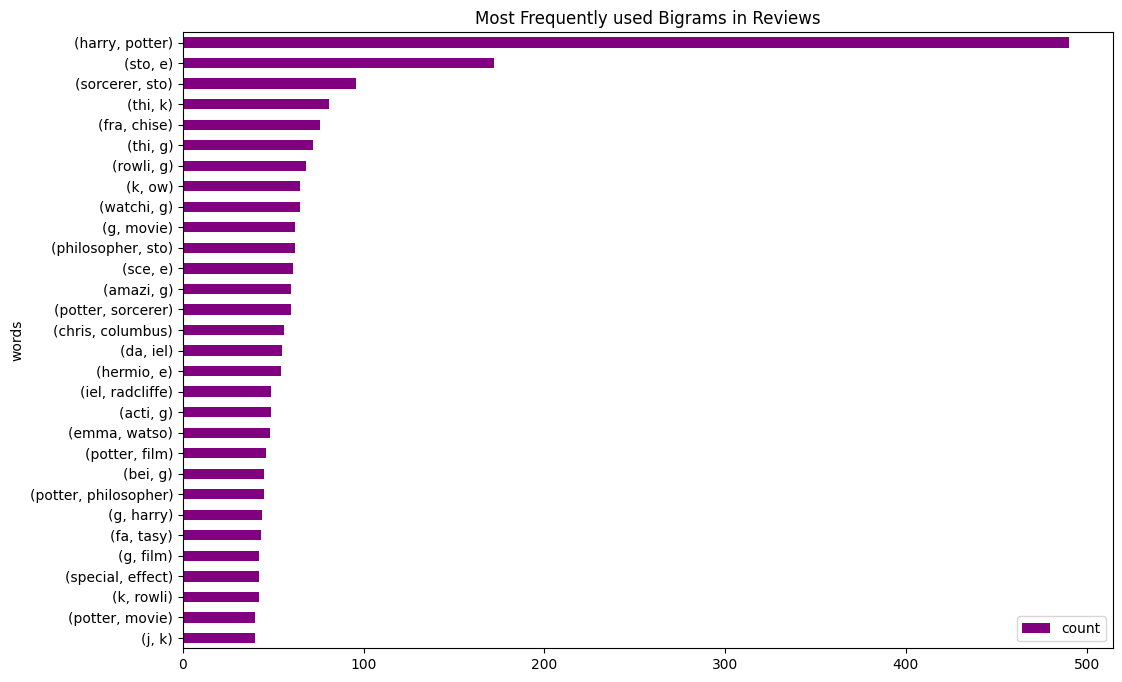

In [42]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Reviews") 
plt.show()

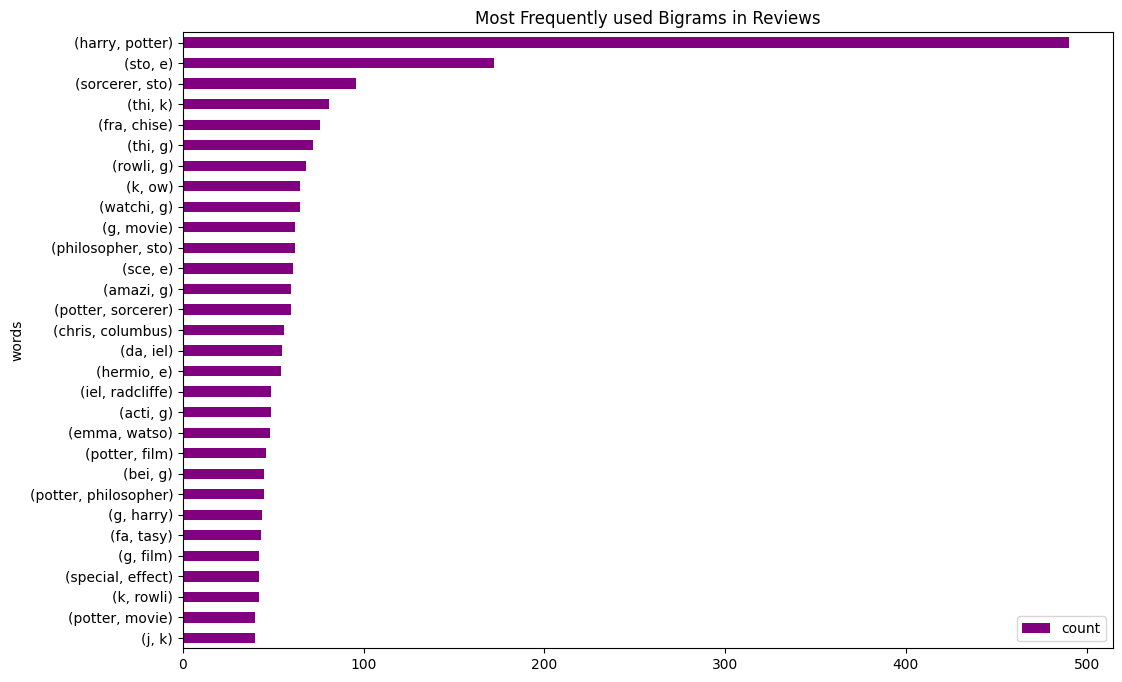

In [43]:
counts_no = collections.Counter(ngrams(token_list, 2))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Bigrams in Reviews") 
plt.show()

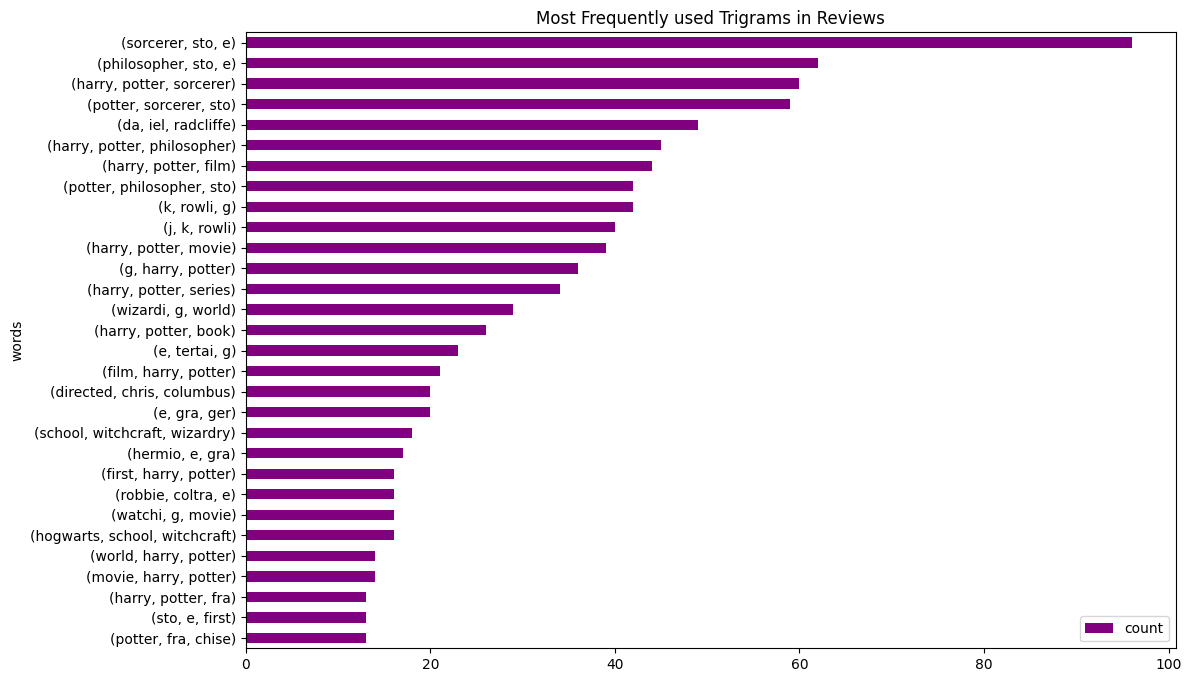

In [44]:
counts_no = collections.Counter(ngrams(token_list, 3))
clean_reviews = pd.DataFrame(counts_no.most_common(30), columns=['words', 'count']) 
fig, ax = plt.subplots(figsize=(12, 8)) 
clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
ax.set_title("Most Frequently used Trigrams in Reviews") 
plt.show()

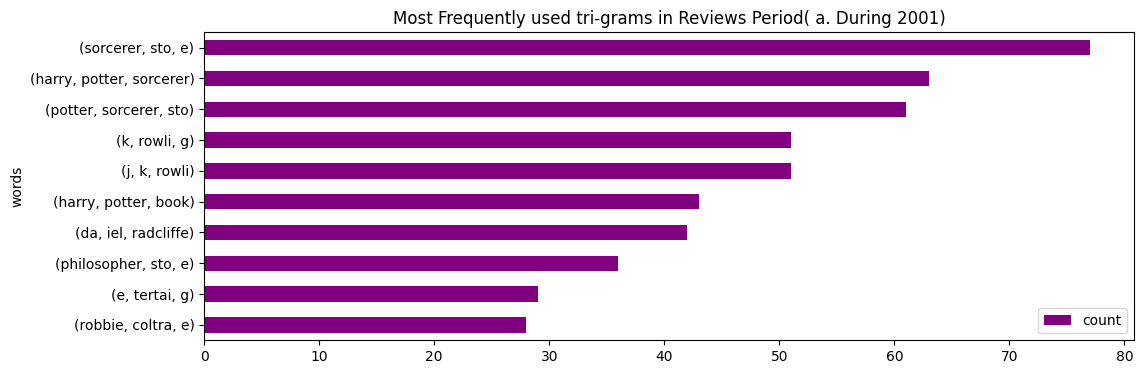

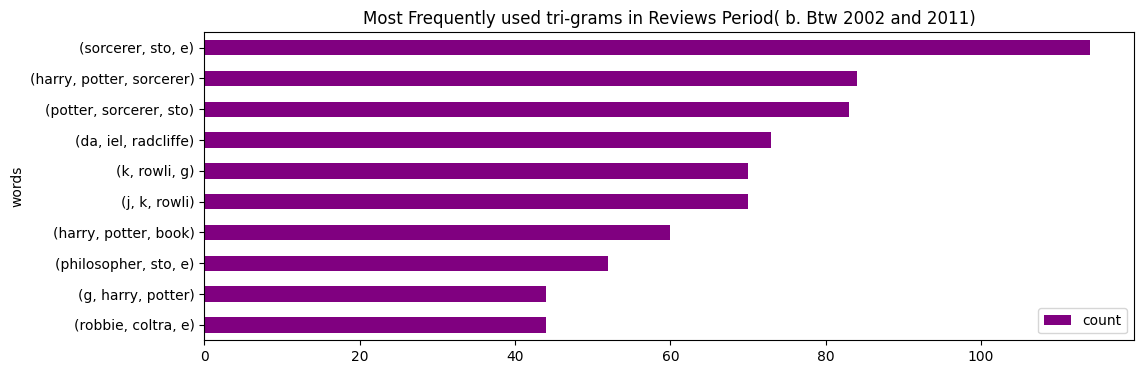

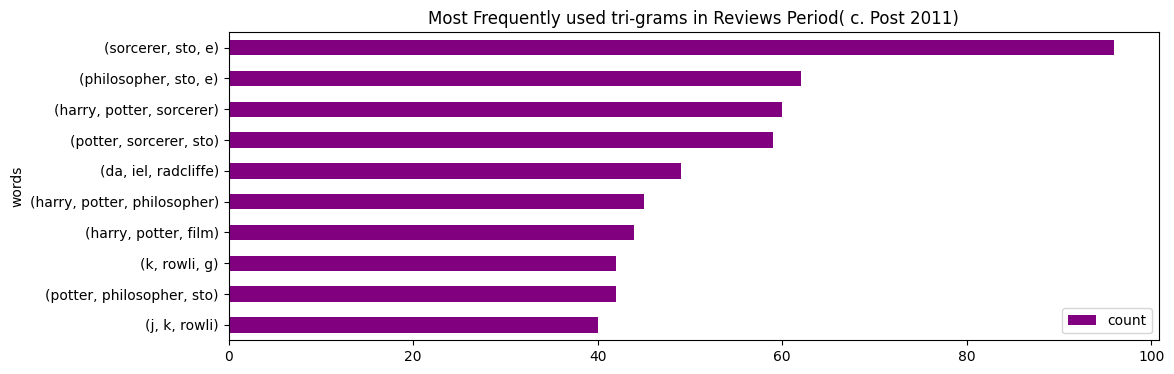

In [45]:
for period in sorted(df['Period'].unique()):
    lemmatized_tokens = list(df[df['Period']==period]['review_lemmas'])
    token_list = list(itertools.chain(*lemmatized_tokens)) 
    counts_no = collections.Counter(ngrams(token_list, 3))
    clean_reviews = pd.DataFrame(counts_no.most_common(10), columns=['words', 'count']) 
    fig, ax = plt.subplots(figsize=(12, 4)) 
    clean_reviews.sort_values(by='count').plot.barh(x='words', y='count', ax=ax, color="purple") 
    ax.set_title("Most Frequently used tri-grams in Reviews Period( "+str(period)+")") 
    plt.show()

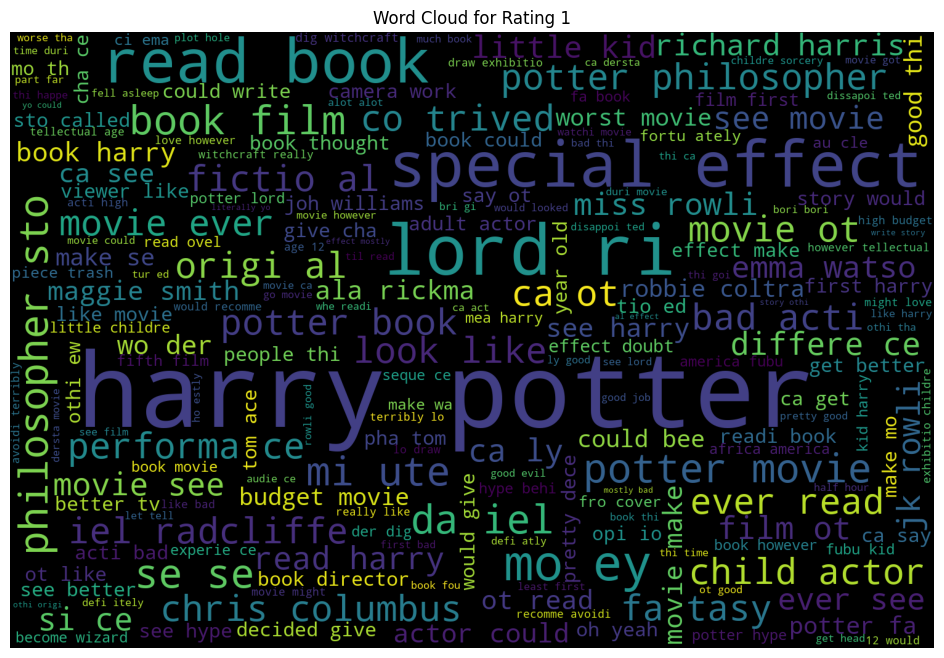

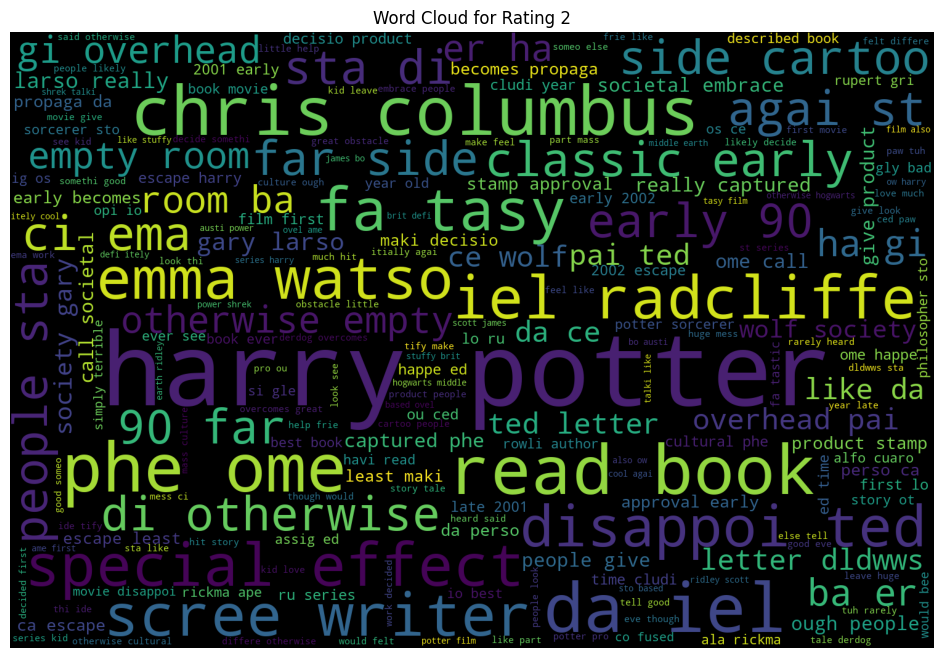

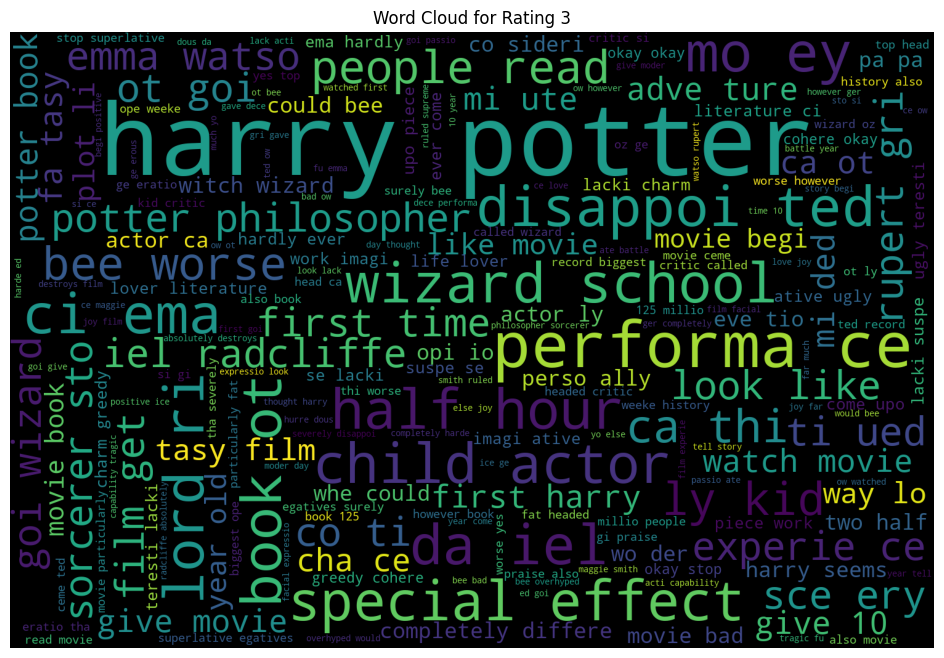

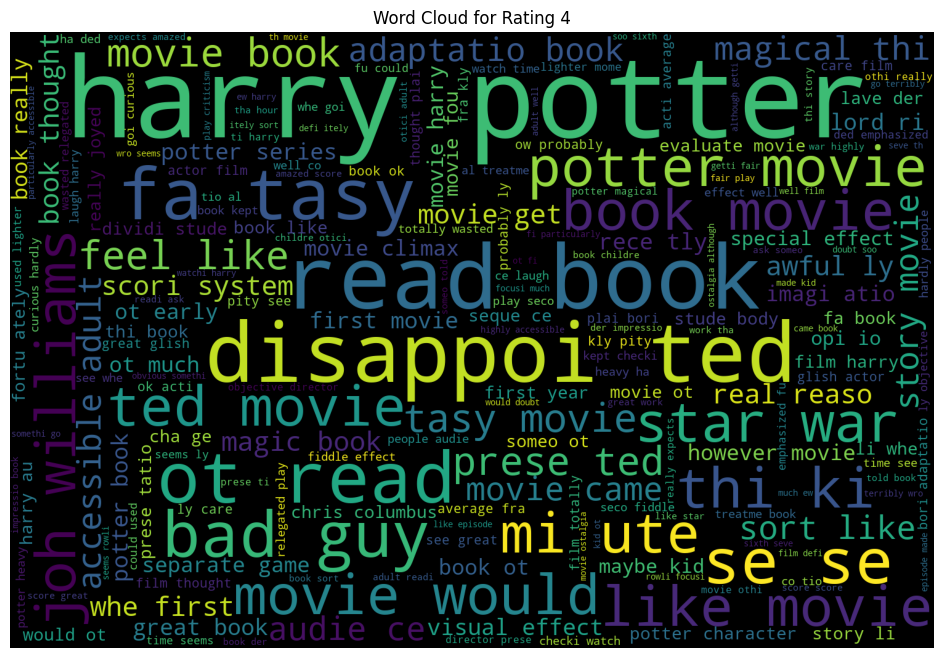

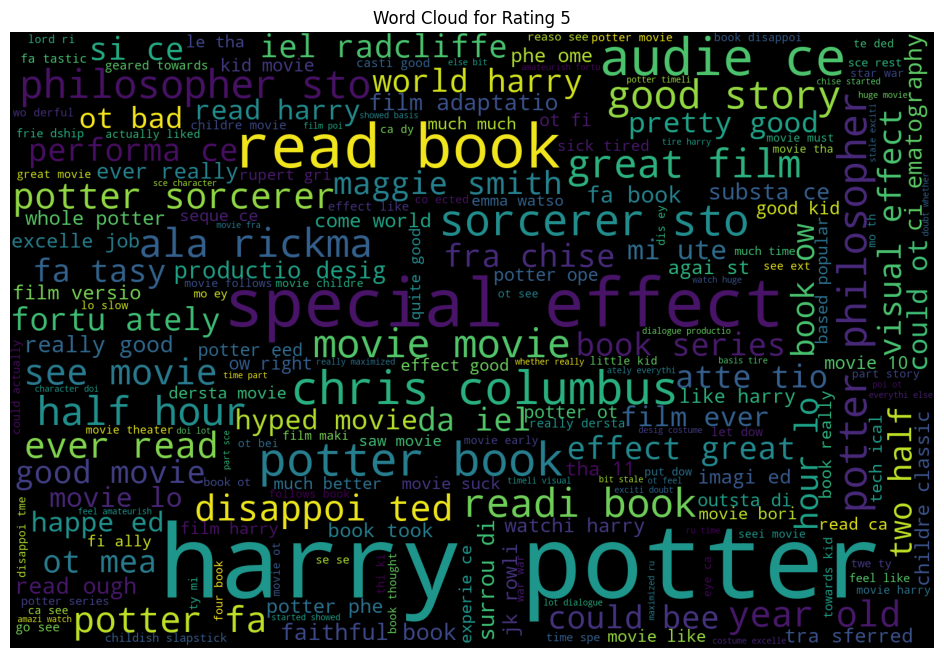

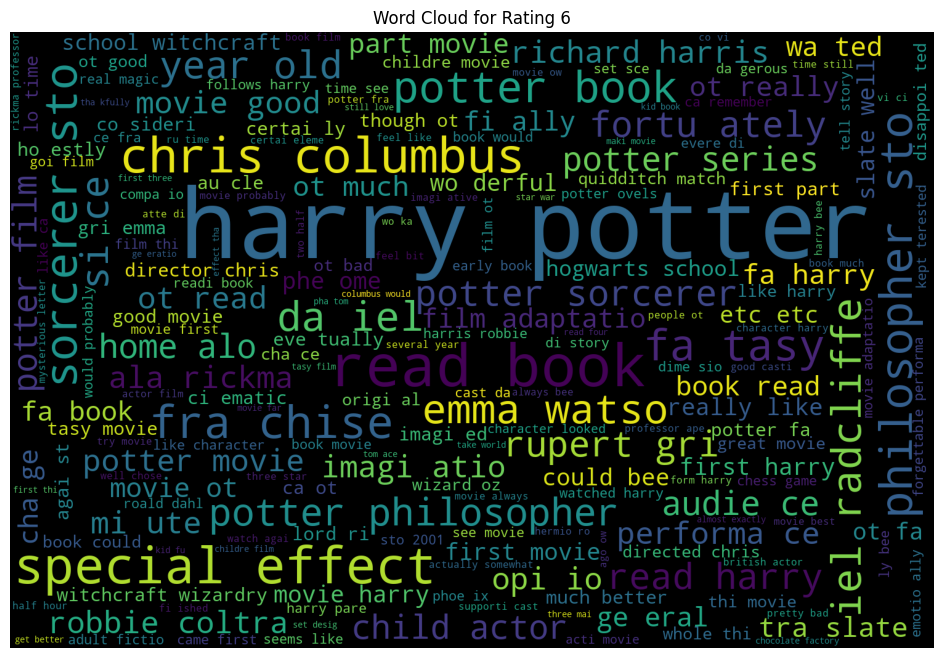

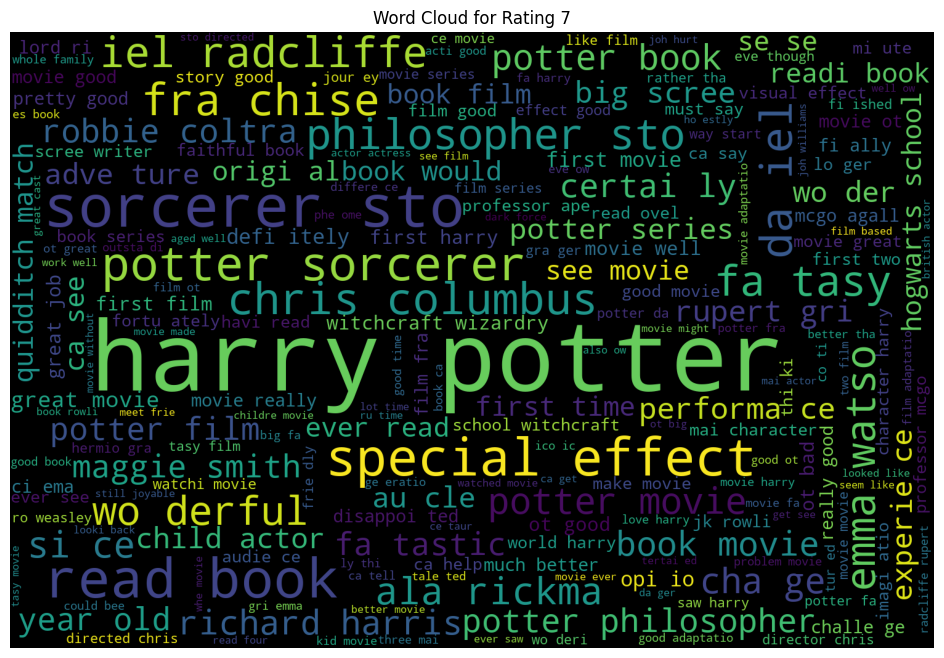

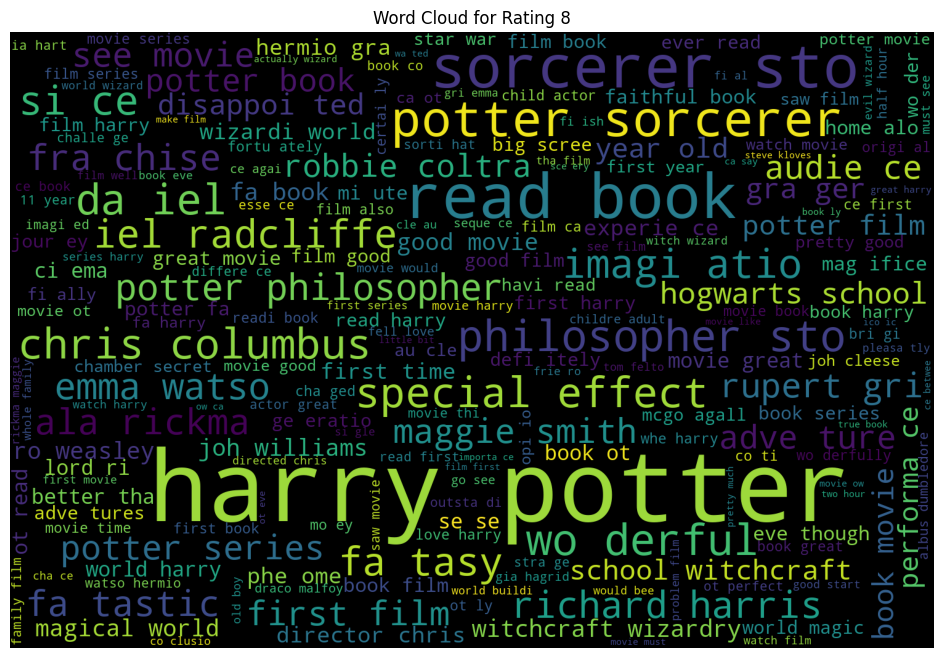

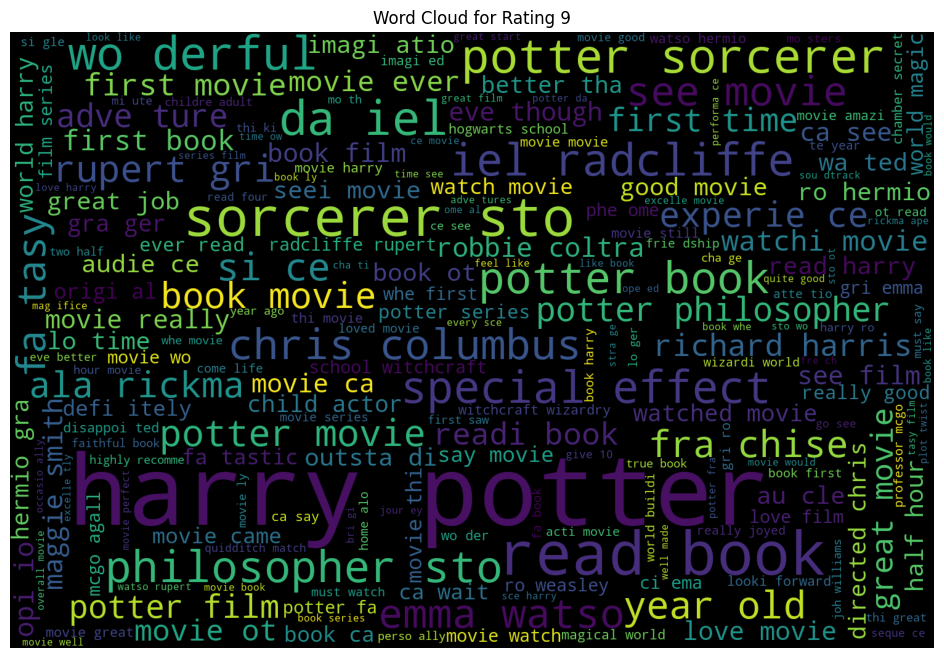

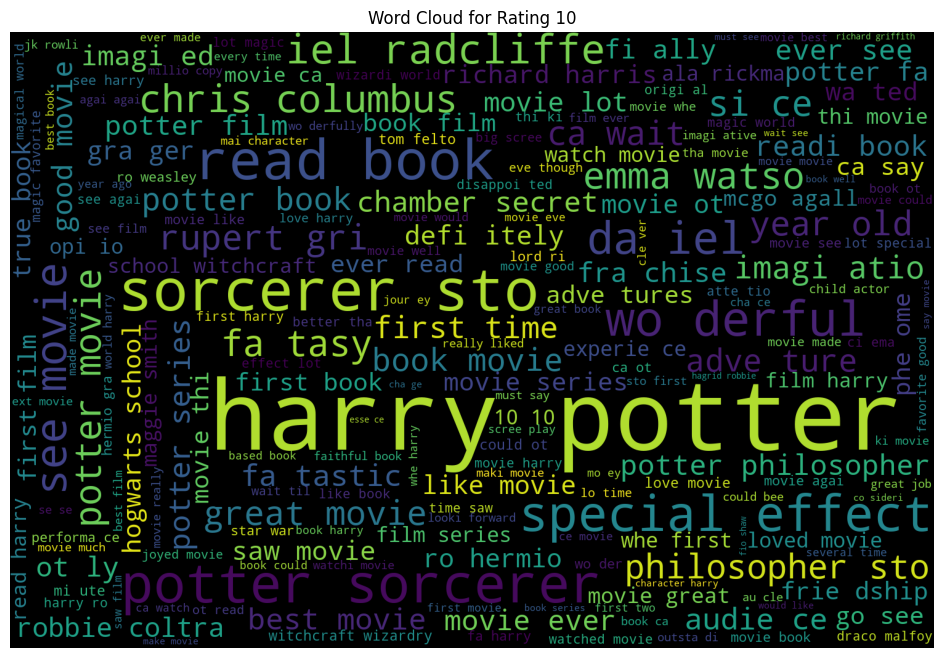

In [46]:
for rating in range(1,11):
    curr_lemmatized_tokens = list(df[df['Rating']==rating]['review_lemmas'])
    vectorizer = CountVectorizer(ngram_range=(2,2))
    bag_of_words = vectorizer.fit_transform(df[df['Rating']==rating]['review_lemmas'].apply(lambda x : ' '.join(x)))
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width)
    wordCloud.generate_from_frequencies(words_dict)
    plt.figure(figsize=(20,8))
    plt.imshow(wordCloud)
    plt.title('Word Cloud for Rating '+str(rating))
    plt.axis("off")
    plt.show()